# Hippocampus Neurogenesis Toy Model

In [138]:
from ipywidgets import interact
import numpy as np
import scipy as sp
import scipy.integrate

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn
seaborn.set_context('notebook')

Loading BokehJS ...

In [27]:
def func(N, t0, p):
    dN0dt = p['r1'] * N[0]
    dN1dt = p['r2'] * N[1]
    return sp.array([dN0dt, dN1dt])

In [57]:
def solve_ode(p):
    t = sp.linspace(p['t_min'], p['t_max'], 100)
    
    N0tot = sp.array([p['N1tot_0'], p['N2tot_0']])
    f = sp.array([p['f1'], p['f2']])
    N0 = (1.0 - f) * N0tot
    l0 = f * N0tot
    
    N = sp.integrate.odeint(func, N0, t, args = (p,))
    N1, N2 = N[:,0], N[:,1]
    l = sp.integrate.odeint(func, l0, t, args = (p,))
    l1, l2 = l[:,0], l[:,1]
    return t, N1, N2, l1, l2

In [81]:
p = dict(t_min = 0.0,
         t_max = 1.0,
         r1 = 9.0,
         r2 = 10.0,
         N1tot_0 = 1000,
         N2tot_0 = 1000,
         f1 = 0.1,
         f2 = 0.1,
        )

In [139]:
def plot_cell_numbers(**keyw):
    p.update(keyw)
    t, N1, N2, l1, l2 = solve_ode(p)
    lN1[0].set_data(t, N1)
    lN2[0].set_data(t, N2)

<IPython.core.display.Javascript object>


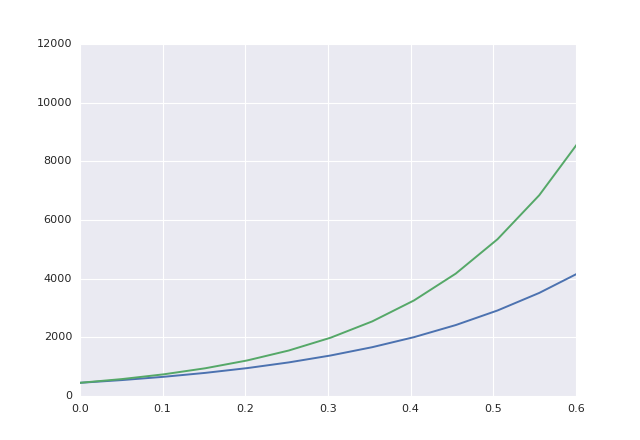

In [140]:
fig, ax = plt.subplots()
lN1 = ax.plot(t, N1)
lN2 = ax.plot(t, N2)
plt.show()

In [142]:
interact(plot_cell_numbers, N1tot_0 = (0, 1000, 0.1), N2tot_0 = (0, 1000, 0.1), r1 = (0, 10, 0.1), r2 = (0, 10, 0.1), t_max = (0.1, 10, 0.1));